In [230]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
import plotly.express as px
import folium
import chardet
import geopandas as gpd
from geopandas.tools import geocode
import warnings
from geopy.geocoders import Nominatim

In [231]:
names = ["Dis No"]



#Natural_Disasters = pd.read_csv('NaturalDisastersv3.xlsx',names=names, lineterminator='\n', nrows=25882)
Natural_Disasters = pd.read_excel('NaturalDisasters.xlsx')

In [232]:
Natural_Disasters = Natural_Disasters[Natural_Disasters['Disaster Group']=='Natural']
Natural_Disasters = Natural_Disasters[(Natural_Disasters['Disaster Subtype']!='Landslide')& (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')&(Natural_Disasters['Disaster Subtype']!='Lava flow')& (Natural_Disasters['Disaster Subtype']!='Rockfall')& (Natural_Disasters['Disaster Subtype']!='Grasshopper')& (Natural_Disasters['Disaster Subtype']!='Locust')& (Natural_Disasters['Disaster Subtype']!='Worms')& (Natural_Disasters['Disaster Subtype']!='Subsidence')]
print( pd.unique(Natural_Disasters['Disaster Subtype'].values))
# & (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')]

#cols=["year","month","day"]
#df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


['Drought' 'Ash fall' 'Tropical cyclone' nan 'Bacterial disease'
 'Avalanche' 'Forest fire' 'Riverine flood' 'Convective storm'
 'Viral disease' 'Heat wave' 'Land fire (Brush, Bush, Pasture)'
 'Coastal flood' 'Cold wave' 'Flash flood' 'Parasitic disease'
 'Severe winter conditions' 'Extra-tropical storm' 'Pyroclastic flow']


In [233]:
print(Natural_Disasters.columns)

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')


In [234]:
NND = Natural_Disasters[['Dis No','Year', 'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','End Year', 'End Month', 'End Day','Total Deaths',]]

NaN = NND[(~NND['End Month'].isna())&(~NND['Start Month'].isna())&(NND['End Month']!=NND['Start Month'])&(NND['Year']<2000)].groupby('Disaster Subtype').count()

print(NaN['Dis No'])
NaN = NND[(~NND['End Month'].isna())&(~NND['Start Month'].isna())&(NND['End Month']==NND['Start Month'])&(NND['Year']<1980)].groupby('Disaster Subtype').count()

print(NaN['Dis No'])
NND.groupby('Disaster Subtype').count()['Dis No']

Disaster Subtype
Ash fall                              6
Avalanche                             4
Bacterial disease                    55
Coastal flood                         9
Cold wave                             6
Convective storm                      7
Drought                              41
Flash flood                          16
Forest fire                          14
Heat wave                             7
Land fire (Brush, Bush, Pasture)      2
Parasitic disease                     3
Riverine flood                      114
Tropical cyclone                     35
Viral disease                        26
Name: Dis No, dtype: int64
Disaster Subtype
Ash fall                             54
Avalanche                            14
Bacterial disease                    51
Coastal flood                         5
Cold wave                             8
Convective storm                     50
Flash flood                          23
Forest fire                          11
Heat wave          

Disaster Subtype
Ash fall                             248
Avalanche                            122
Bacterial disease                    778
Coastal flood                         85
Cold wave                            310
Convective storm                    1165
Drought                              800
Extra-tropical storm                 148
Flash flood                          818
Forest fire                          314
Heat wave                            228
Land fire (Brush, Bush, Pasture)      92
Parasitic disease                     51
Pyroclastic flow                       4
Riverine flood                      2657
Severe winter conditions              77
Tropical cyclone                    2471
Viral disease                        543
Name: Dis No, dtype: int64

In [235]:
pd.unique(NND['Year'].values)

array([1900, 1902, 1903, 1904, 1906, 1907, 1909, 1910, 1911, 1912, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1935, 1936, 1937, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1901, 1905, 1913, 1914, 1934,
       1938, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [236]:
Disasters_with_origin = NND.dropna(subset = ['Origin'])
Disasters_with_origin

Dis No  Year                         Country  \
528    1960-9039-HKG  1960                       Hong Kong   
984    1975-0154-CHN  1975                           China   
1123   1977-0084-FRA  1977                          France   
1219   1909-0017-USA  1909  United States of America (the)   
1504   1953-0007-NLD  1953               Netherlands (the)   
...              ...   ...                             ...   
25860  2023-0046-NZL  2023                     New Zealand   
25865  2023-0102-PHL  2023               Philippines (the)   
25878  2023-0080-ZAF  2023                    South Africa   
25879  2023-0110-ZMB  2023                          Zambia   
25881  2023-0022-SRB  2023                          Serbia   

                                                Location  \
528                                                  NaN   
984                                       Henan province   
1123                                   Gers (South West)   
1219                                           Louisiana   
1504   Zeeland, South Holland and North Brabant .larg...   
...                                                  ...   
25860  Kelston, Albany, Randwick Park, Mangere, Wells...   
25865  Davao City (Davao del Norte); Davao Oriental (...   
25878  Mpumalanga, the Eastern Cape, Gauteng, KwaZulu...   
25879              Namwala, Monze and Mazabuka districts   
25881  Sjenica and Brodarevo Novi Pazar Municipality;...   

                                  Origin         Associated Dis  \
528                 Late arrival of rain                    NaN   
984                              Typhoon  Broken Dam/Burst bank   
1123                         Heavy rains                    NaN   
1219                      Meteorological                    NaN   
1504                Storm and wave surge  Broken Dam/Burst bank   
...                                  ...                    ...   
25860                        Heavy rains                    NaN   
25865                        Heavy rains                    NaN   
25878                        Heavy rains                    NaN   
25879                        Heavy rains                    NaN   
25881  Heavy rainfall and river overflow                    NaN   

      Associated Dis2 Disaster Subtype Disaster Subsubtype  Start Year  \
528               NaN          Drought                 NaN        1960   
984               NaN              NaN                 NaN        1975   
1123              NaN   Riverine flood                 NaN        1977   
1219              NaN    Coastal flood                 NaN        1909   
1504              NaN    Coastal flood                 NaN        1953   
...               ...              ...                 ...         ...   
25860             NaN              NaN                 NaN        2023   
25865             NaN              NaN                 NaN        2023   
25878             NaN              NaN                 NaN        2023   
25879             NaN      Flash flood                 NaN        2023   
25881             NaN   Riverine flood                 NaN        2023   

       Start Month  Start Day  End Year  End Month  End Day  Total Deaths  
528            1.0        NaN      1960        NaN      NaN           NaN  
984            4.0        NaN      1975        4.0      NaN       20000.0  
1123           7.0        8.0      1977        7.0      8.0          26.0  
1219           9.0       22.0      1909        9.0     22.0          72.0  
1504           1.0       31.0      1953        1.0     31.0        2000.0  
...            ...        ...       ...        ...      ...           ...  
25860          1.0       27.0      2023        1.0     30.0           4.0  
25865          2.0       20.0      2023        2.0     24.0           2.0  
25878          2.0        8.0      2023        2.0     21.0          17.0  
25879          2.0        7.0      2023        2.0      9.0           NaN  
25881          1.0

In [237]:
print(pd.unique(Disasters_with_origin['Origin'].values))

['Late arrival of rain' 'Typhoon' 'Heavy rains' 'Meteorological'
 'Storm and wave surge' 'Heavy rain' 'Brief torrential rains' 'Famine'
 'El Nino' 'Extra-tropical cyclone' 'Brief torrential rain'
 'Heavy rains and thunderstorms' 'Monsoonal rain' 'Monssonal rain'
 'Hevay rain' 'Monsoon rain' 'Tropical cyclone' 'Drought period'
 'Prolonged drought' 'Monsoon rains'
 'Volcanic activity, tropical rainstorms and ash from the eruptions'
 'monsoonal rain' 'Heavy rain and Snowmelt' 'Snowmelt and Heavy rains'
 'Rain, snowmelt' 'Earthquake' 'Snowmelt' 'Typhoon Gali' 'Mosoonal rain'
 'Heavy rain and brief torrential rain'
 'Breakdown water supply, poor hygiene practices and increase of number of displaced perdons'
 'Flood' 'Heavy rains, melting snow' 'Continous rainfall'
 'Snow storm and heavy winds' 'Rain and snowmelt' 'Lack rainfall'
 'Food consumed' 'El Nino phenomenom'
 'butchering of cattle which died of sudden illness and consumption of meat and other tissues'
 'poor sanitation, lack of safe

In [238]:
print(pd.unique(Disasters_with_origin['Associated Dis'].values))

[nan 'Broken Dam/Burst bank' 'Epidemic' 'Slide (land, mud, snow, rock)'
 'Rain' 'Pollution' 'Tsunami/Tidal wave' 'Flood' 'Wildfire' 'Fire'
 'Crop failure' 'Heat wave' 'Cold wave' 'Food shortage' 'Hail'
 'Transport accident' 'Famine' 'Explosion' 'Lightening' 'Water shortage'
 'Industrial accidents' 'Storm' 'Avalanche (Snow, Debris)' 'Collapse'
 'Snow/ice']


In [239]:
NND = Natural_Disasters[['Year', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','Total Deaths']]

In [240]:
Categories = NND['Disaster Subtype'].value_counts()
len(Categories)

18

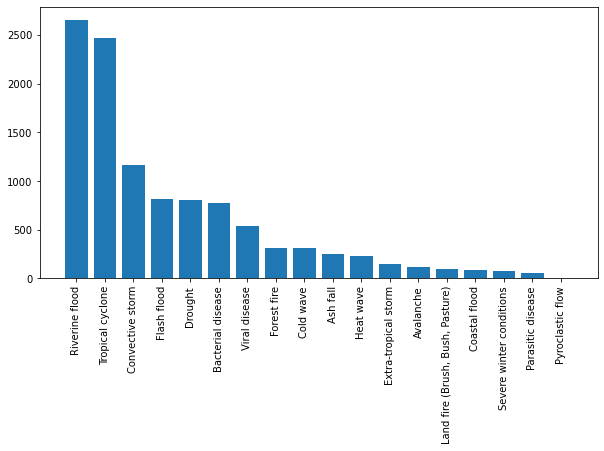

In [241]:

plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.show()

In [242]:
Categories = NND['Disaster Subsubtype'].dropna().value_counts()
Categories

Tornado                    289
Severe storm               252
Winter storm/Blizzard      228
Lightning/Thunderstorms    186
Hail                       109
Sand/Dust storm             19
Storm/Surge                  7
Snow/Ice                     6
Derecho                      6
Name: Disaster Subsubtype, dtype: int64

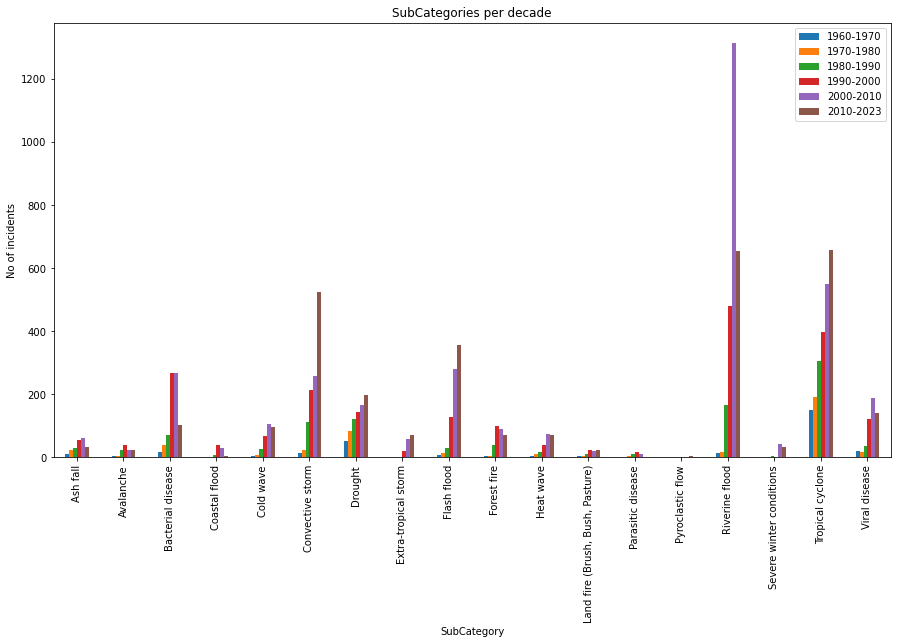

In [243]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)]['Disaster Subtype'].value_counts(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)]['Disaster Subtype'].value_counts(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)]['Disaster Subtype'].value_counts(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)]['Disaster Subtype'].value_counts(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)]['Disaster Subtype'].value_counts(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)]['Disaster Subtype'].value_counts()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()



In [244]:
Natural_Disasters['Year']

0        1900
1        1900
4        1902
5        1902
7        1903
         ... 
25876    2023
25878    2023
25879    2023
25880    2023
25881    2023
Name: Year, Length: 14210, dtype: int64

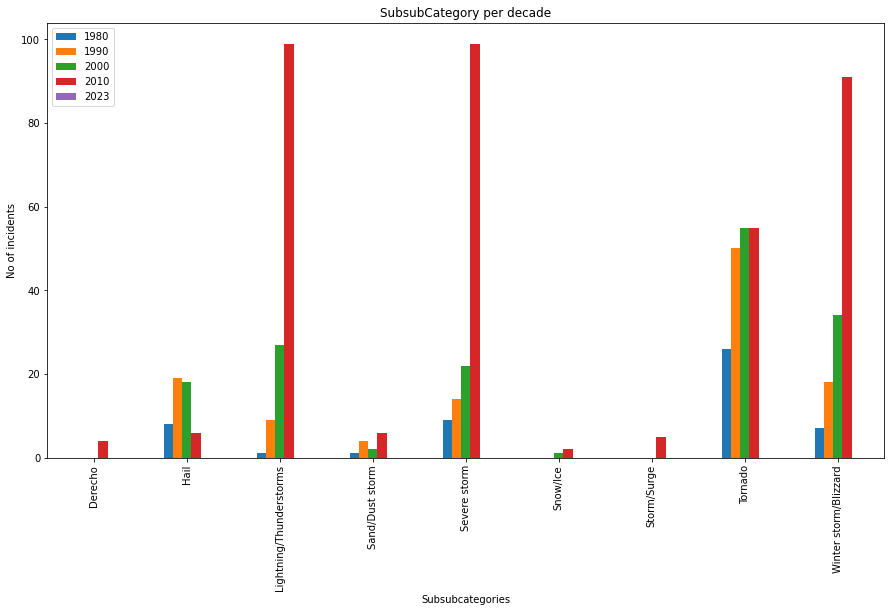

In [245]:
Categories = NND['Disaster Subsubtype'].dropna().value_counts()
Categories


Categories = {'1980':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].dropna()['Disaster Subsubtype'].value_counts(),
             '1990':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].dropna()['Disaster Subsubtype'].value_counts(),
             '2000':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].dropna()['Disaster Subsubtype'].value_counts(),
             '2010':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].dropna()['Disaster Subsubtype'].value_counts(),
             '2023':{}}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubsubCategory per decade')
plt.xlabel('Subsubcategories')
plt.ylabel('No of incidents')
plt.show()

In [246]:
location_name = 'Chikoma'
country = 'ZMB'

# geocode the location using geopandas
geolocator = Nominatim(user_agent='natural_disaster_analysis')
location = geolocator.geocode('1600 Pennsylvania Avenue NW, Washington, DC 20500')

# extract the latitude and longitude from the result
latitude = location.latitude
longitude = location.longitude

print(f'The latitude and longitude of {location_name} in {country} are ({latitude}, {longitude}).')

The latitude and longitude of Chikoma in ZMB are (38.897699700000004, -77.03655315).


In [247]:
Disaster_Country= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_Before_1980= Natural_Disasters[Natural_Disasters['Year'] <=1980].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_After_1980= Natural_Disasters[Natural_Disasters['Year'] > 1980].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Dis No'].count()


In [248]:
Disaster_Country = Disaster_Country.reset_index()

In [249]:
Droughts = Disaster_Country[Disaster_Country['Disaster Subtype']=='Drought']
Droughts = Disaster_Country_Before_1980[Disaster_Country['Disaster Subtype']=='Drought']


<ipython-input-249-a6c421cc11cd>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [250]:
Droughts = Disaster_Country[Disaster_Country['Disaster Subtype']=='Drought']

fig = px.choropleth(Droughts, locations='ISO', color='Dis No',
                    scope='world', projection='natural earth')
fig.show()

In [251]:

def mapping(Data_before_1980 = Disaster_Country_Before_1980, Data_after_1980 = Disaster_Country_After_1980,subtype = 'Drought',plotted_parameter ='Dis No' ,colour = 'YlOrRd' ):
    
    maximum = Data_after_1980[Data_after_1980['Disaster Subtype']==subtype][plotted_parameter].max()
    
    
    Disaster = Data_before_1980[Data_before_1980['Disaster Subtype']==subtype]

    fig = px.choropleth(Disaster, locations='ISO', color=plotted_parameter,
                    scope='world', projection='natural earth', color_continuous_scale = 'YlOrRd',range_color=[0, maximum])
    
    fig.update_layout(
    title={
        'text': plotted_parameter+' of '+subtype + 's before 1980',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    )
    
    fig.show()

    Disaster = Data_after_1980[Data_after_1980['Disaster Subtype']==subtype]


    fig = px.choropleth(Disaster, locations='ISO', color=plotted_parameter,
                    scope='world', projection='natural earth',color_continuous_scale ='YlOrRd',range_color=[0, maximum])
    
        
    fig.update_layout(
    title={
        'text': plotted_parameter+' of '+subtype + 's after 1980',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    )
    
    fig.show()


    
mapping()

In [252]:
mapping(subtype= 'Riverine flood')

In [253]:
mapping(subtype= 'Flash flood')

In [254]:
mapping(subtype= 'Tropical cyclone')

In [255]:
mapping(subtype='Bacterial disease')

In [256]:
mapping(subtype='Viral disease')

In [257]:
mapping(subtype='Heat wave')

In [258]:
mapping(subtype='Cold wave')

In [259]:
mapping(subtype='Forest fire')

In [260]:
Money = Natural_Disasters[['Dis No','Year', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Disaster Subtype','Disaster Subsubtype', "Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damages ('000 US$)", "Insured Damages, Adjusted ('000 US$)",
       "Total Damages ('000 US$)", "Total Damages, Adjusted ('000 US$)","AID Contribution ('000 US$)"]]

In [261]:
NND = Money
NaN = NND[(~NND["AID Contribution ('000 US$)"].isna())&(NND['Year']>1980)].groupby('Disaster Subtype').count()

### AID Contribution

In [262]:
Money = NND[(~NND["AID Contribution ('000 US$)"].isna())]

Disaster Subtype
Ash fall                             149650.0
Avalanche                               758.0
Bacterial disease                      2763.0
Coastal flood                         41046.0
Cold wave                              3520.0
Convective storm                      26956.0
Drought                             1073576.0
Flash flood                         2893552.0
Forest fire                           29452.0
Land fire (Brush, Bush, Pasture)       2561.0
Pyroclastic flow                      10000.0
Riverine flood                      2250158.0
Severe winter conditions              32947.0
Tropical cyclone                    2473540.0
Viral disease                         11344.0
Name: AID Contribution ('000 US$), dtype: float64


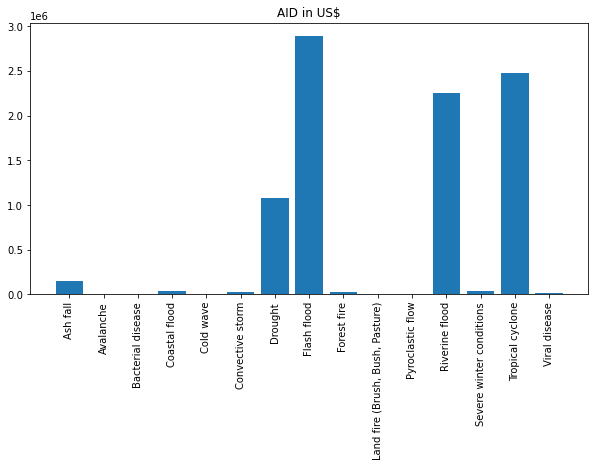

In [263]:
Categories = Money.groupby('Disaster Subtype')["AID Contribution ('000 US$)"].sum()
print(Categories)
plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.title('AID in US$')
plt.show()

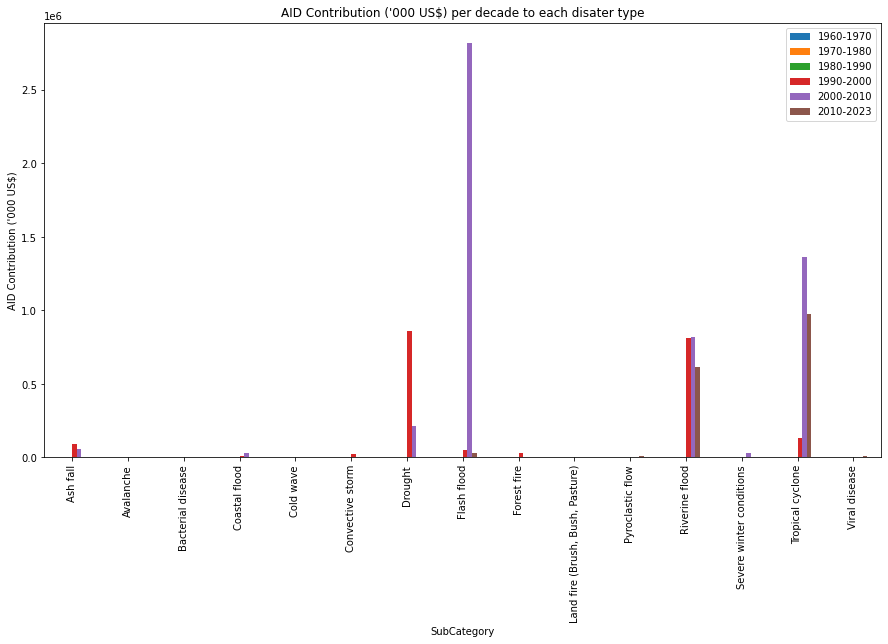

In [264]:
def Plotting_summable_Data(Data=Money, column_to_be_plotted = "AID Contribution ('000 US$)"): 
    NND = Data

    Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')[column_to_be_plotted].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')[column_to_be_plotted].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')[column_to_be_plotted].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')[column_to_be_plotted].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')[column_to_be_plotted].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')[column_to_be_plotted].sum()}
    Categories_Years= pd.DataFrame(Categories)

    fig, ax = plt.subplots(figsize=(15, 8))
    Categories_Years.plot(kind='bar', rot=90, ax=ax)
    plt.title(column_to_be_plotted +' per decade to each disater type')
    plt.xlabel('SubCategory')
    plt.ylabel(column_to_be_plotted)
    plt.show()
    
    Disaster_Country_Before_1980_AID = NND[NND['Year']<=1980].groupby(['ISO','Disaster Subtype'])[column_to_be_plotted].sum().reset_index()
    Disaster_Country_After_1980_AID = NND[NND['Year']>1980].groupby(['ISO','Disaster Subtype'])[column_to_be_plotted].sum().reset_index()

    mapping(subtype = 'Flash flood',Data_before_1980 = Disaster_Country_Before_1980_AID, Data_after_1980 = Disaster_Country_After_1980_AID,plotted_parameter =column_to_be_plotted,colour = 'YlOrRd' )
    mapping(subtype = 'Drought',Data_before_1980 = Disaster_Country_Before_1980_AID, Data_after_1980 = Disaster_Country_After_1980_AID,plotted_parameter =column_to_be_plotted,colour = 'YlOrRd' )
    mapping(subtype = 'Heat wave',Data_before_1980 = Disaster_Country_Before_1980_AID, Data_after_1980 = Disaster_Country_After_1980_AID,plotted_parameter =column_to_be_plotted,colour = 'YlOrRd' )
    mapping(subtype = 'Cold wave',Data_before_1980 = Disaster_Country_Before_1980_AID, Data_after_1980 = Disaster_Country_After_1980_AID,plotted_parameter =column_to_be_plotted,colour = 'YlOrRd' )
    mapping(subtype = 'Riverine flood',Data_before_1980 = Disaster_Country_Before_1980_AID, Data_after_1980 = Disaster_Country_After_1980_AID,plotted_parameter =column_to_be_plotted,colour = 'YlOrRd' )
    mapping(subtype = 'Tropical cyclone',Data_before_1980 = Disaster_Country_Before_1980_AID, Data_after_1980 = Disaster_Country_After_1980_AID,plotted_parameter =column_to_be_plotted,colour = 'YlOrRd' )
    mapping(subtype = 'Forest fire',Data_before_1980 = Disaster_Country_Before_1980_AID, Data_after_1980 = Disaster_Country_After_1980_AID,plotted_parameter =column_to_be_plotted,colour = 'YlOrRd' )
    mapping(subtype = 'Bacterial disease',Data_before_1980 = Disaster_Country_Before_1980_AID, Data_after_1980 = Disaster_Country_After_1980_AID,plotted_parameter =column_to_be_plotted,colour = 'YlOrRd' )
    mapping(subtype = 'Viral disease',Data_before_1980 = Disaster_Country_Before_1980_AID, Data_after_1980 = Disaster_Country_After_1980_AID,plotted_parameter =column_to_be_plotted,colour = 'YlOrRd' )

 
Plotting_summable_Data()



### Total Damages (US\$)

### Insured Damages

Disaster Subtype
Ash fall                               292191.0
Avalanche                                   0.0
Bacterial disease                           0.0
Coastal flood                          909620.0
Cold wave                                  10.0
Convective storm                      1259765.0
Drought                               6016772.0
Flash flood                          21775479.0
Forest fire                          13282800.0
Land fire (Brush, Bush, Pasture)      1836000.0
Pyroclastic flow                            0.0
Riverine flood                      207658662.0
Severe winter conditions             21940000.0
Tropical cyclone                     62279158.0
Viral disease                               0.0
Name: Total Damages ('000 US$), dtype: float64


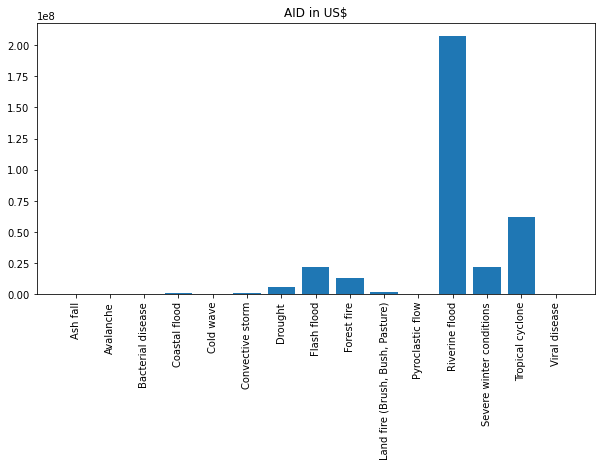

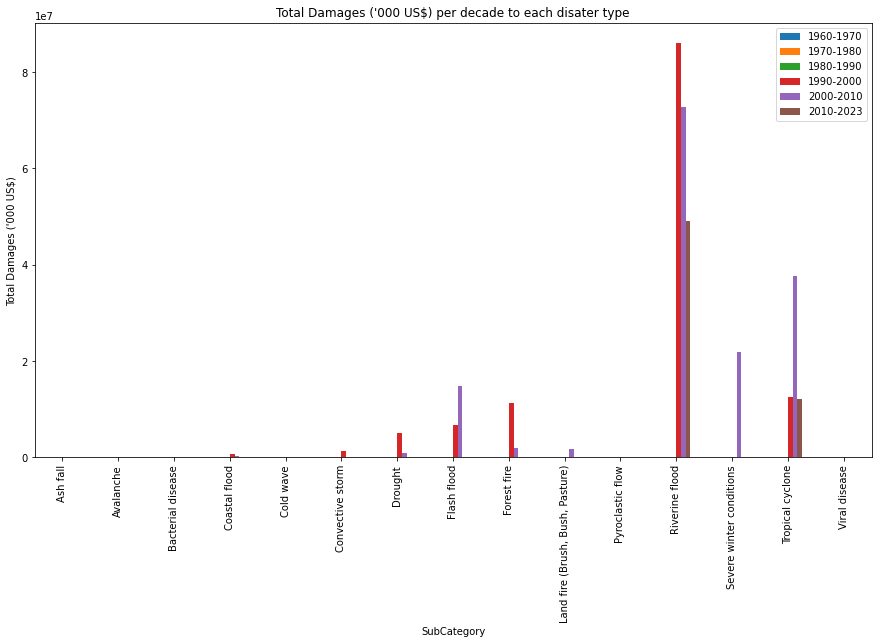

In [265]:
Categories = Money.groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum()
print(Categories)
plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.title('AID in US$')
plt.show()

Plotting_summable_Data(Data=Money, column_to_be_plotted = "Total Damages ('000 US$)")

#### Reconstruction cost

Disaster Subtype
Ash fall                                  0.0
Avalanche                                 0.0
Bacterial disease                         0.0
Coastal flood                             0.0
Cold wave                                 0.0
Convective storm                          0.0
Drought                                   0.0
Flash flood                            3000.0
Forest fire                               0.0
Land fire (Brush, Bush, Pasture)          0.0
Pyroclastic flow                          0.0
Riverine flood                      1988751.0
Severe winter conditions                  0.0
Tropical cyclone                     183000.0
Viral disease                             0.0
Name: Reconstruction Costs ('000 US$), dtype: float64


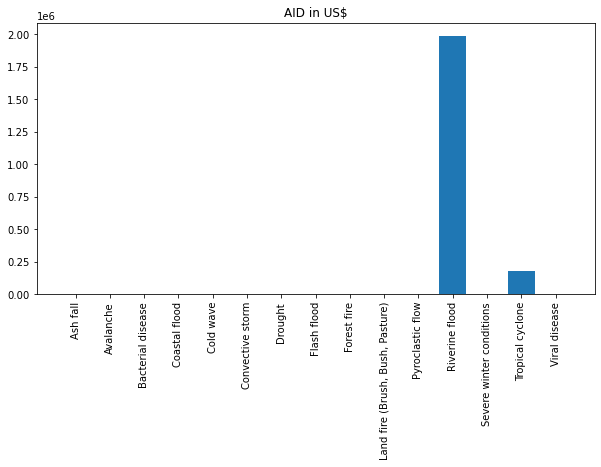

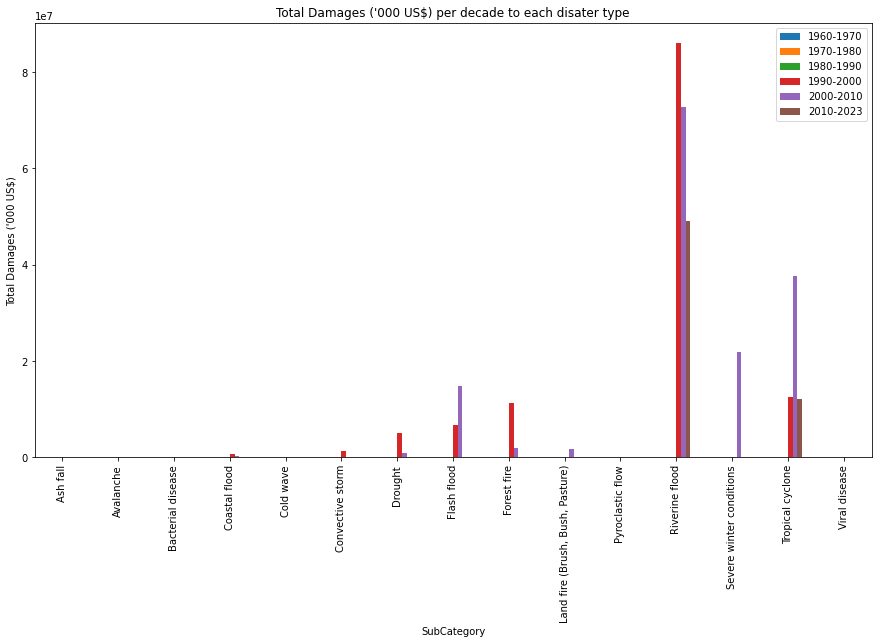

In [266]:
Categories = Money.groupby('Disaster Subtype')["Reconstruction Costs ('000 US$)"].sum()
print(Categories)
plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.title('AID in US$')
plt.show()

Plotting_summable_Data(Data=Money, column_to_be_plotted = "Total Damages ('000 US$)")

In [267]:
Deaths =Natural_Disasters[['Dis No','Year', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Disaster Subtype','Disaster Subsubtype', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected']]


Disaster Subtype
Ash fall                               85831.0
Avalanche                               5604.0
Bacterial disease                    5931259.0
Coastal flood                           5352.0
Cold wave                              17835.0
Convective storm                       22848.0
Drought                             11733948.0
Extra-tropical storm                     558.0
Flash flood                            70840.0
Forest fire                             3336.0
Heat wave                             188913.0
Land fire (Brush, Bush, Pasture)         966.0
Parasitic disease                      10265.0
Pyroclastic flow                         532.0
Riverine flood                       4445842.0
Severe winter conditions                3736.0
Tropical cyclone                     1355318.0
Viral disease                         951788.0
Name: Total Deaths, dtype: float64


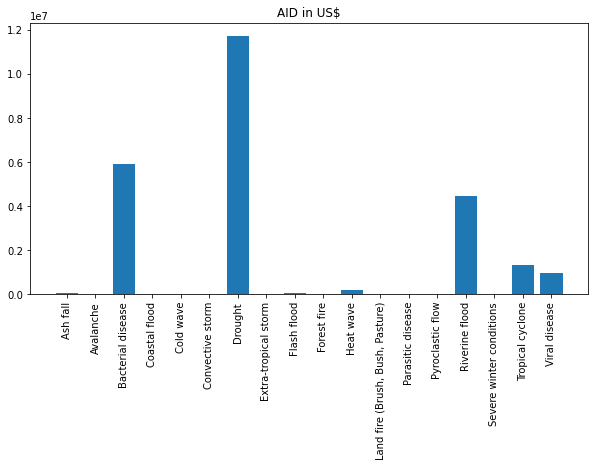

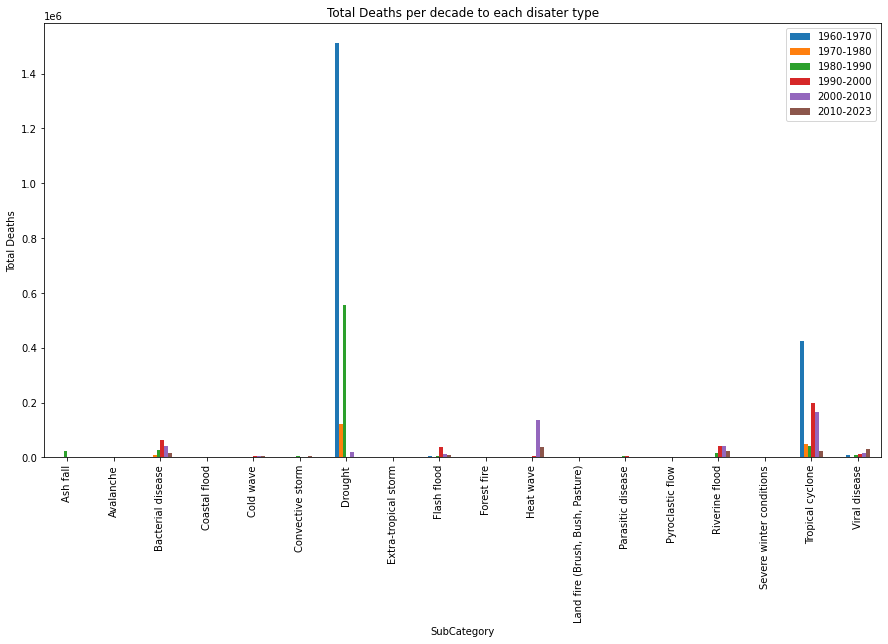

In [268]:
Categories = Deaths.groupby('Disaster Subtype')['Total Deaths'].sum()
print(Categories)
plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.title('AID in US$')
plt.show()

Plotting_summable_Data(Data=Deaths, column_to_be_plotted = 'Total Deaths')

Disaster Subtype
Ash fall                              11714.0
Avalanche                              1179.0
Bacterial disease                   1248273.0
Coastal flood                          1309.0
Cold wave                           1840254.0
Convective storm                     211471.0
Drought                                  32.0
Extra-tropical storm                    476.0
Flash flood                           70059.0
Forest fire                            7207.0
Heat wave                            229439.0
Land fire (Brush, Bush, Pasture)       5012.0
Parasitic disease                      5110.0
Pyroclastic flow                         54.0
Riverine flood                       825745.0
Severe winter conditions              16568.0
Tropical cyclone                    1138114.0
Viral disease                       1387917.0
Name: No Injured, dtype: float64


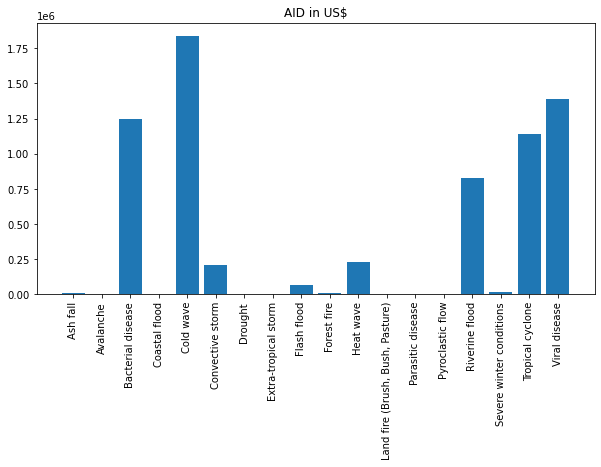

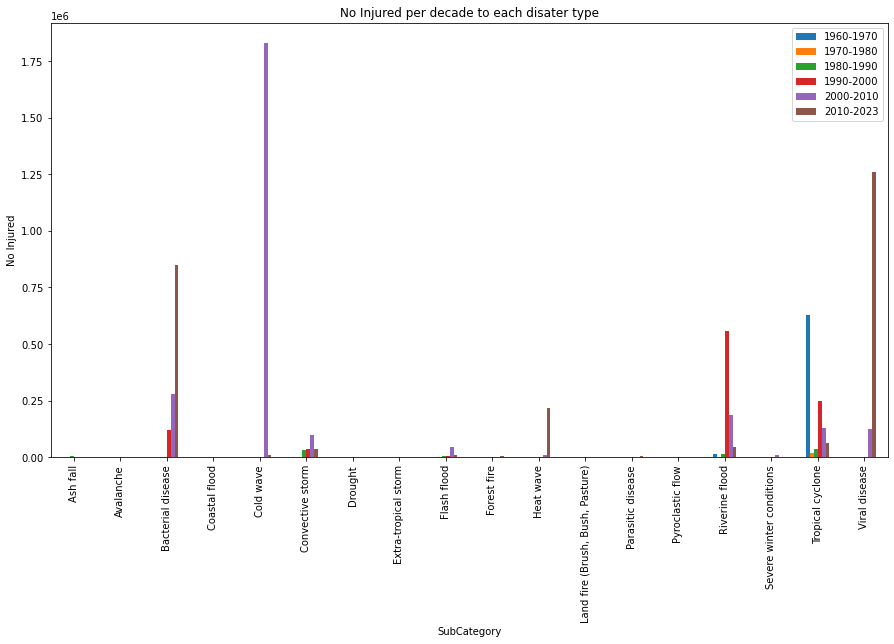

In [269]:
Categories = Deaths.groupby('Disaster Subtype')['No Injured'].sum()
print(Categories)
plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.title('AID in US$')
plt.show()

Plotting_summable_Data(Data=Deaths, column_to_be_plotted = 'No Injured')

Disaster Subtype
Ash fall                            6.256514e+06
Avalanche                           6.106100e+04
Bacterial disease                   4.487098e+06
Coastal flood                       1.965971e+07
Cold wave                           1.541099e+07
Convective storm                    2.915569e+08
Drought                             2.934889e+09
Extra-tropical storm                3.942427e+06
Flash flood                         2.024096e+08
Forest fire                         1.666578e+07
Heat wave                           4.743590e+06
Land fire (Brush, Bush, Pasture)    9.220380e+05
Parasitic disease                   2.875925e+07
Pyroclastic flow                    1.738905e+06
Riverine flood                      2.464426e+09
Severe winter conditions            8.221960e+07
Tropical cyclone                    8.608694e+08
Viral disease                       1.095432e+07
Name: No Affected, dtype: float64


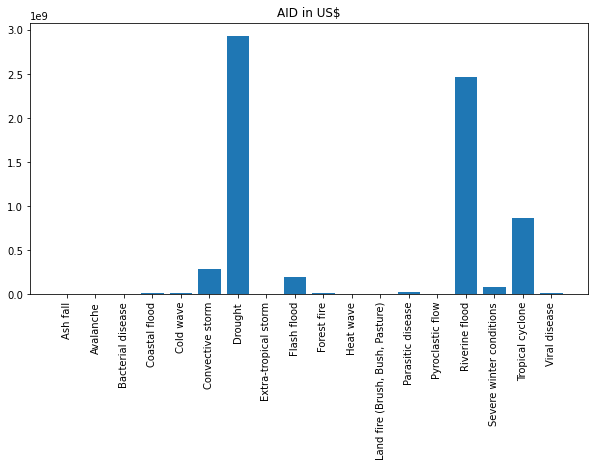

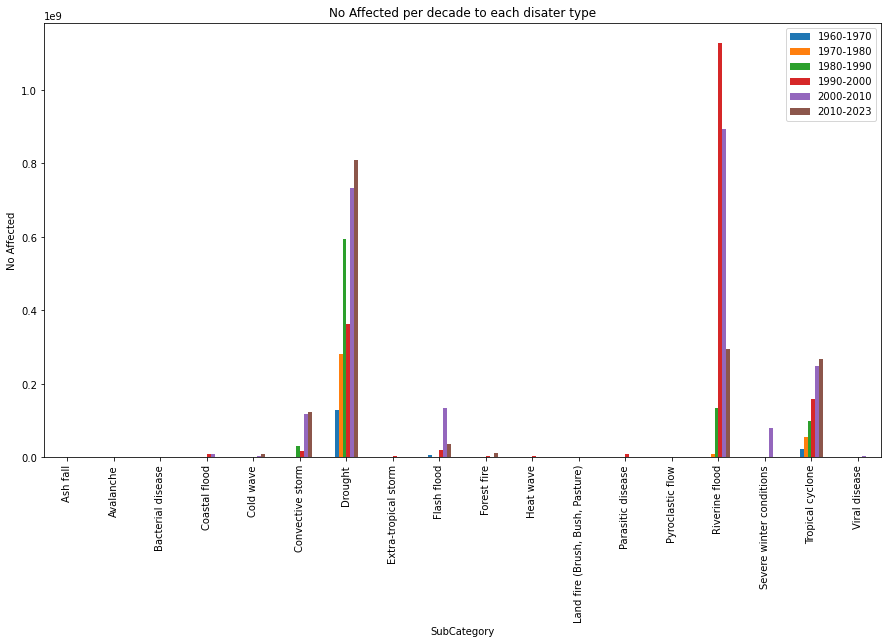

In [272]:

Categories = Deaths.groupby('Disaster Subtype')['No Affected'].sum()
print(Categories)
plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.title('AID in US$')
plt.show()

Plotting_summable_Data(Data=Deaths, column_to_be_plotted = 'No Affected')

Disaster Subtype
Ash fall                              375790.0
Avalanche                              45910.0
Bacterial disease                          0.0
Coastal flood                        1673924.0
Cold wave                             249000.0
Convective storm                     2208969.0
Drought                                20000.0
Extra-tropical storm                    1600.0
Flash flood                          5109848.0
Forest fire                           155991.0
Heat wave                                  0.0
Land fire (Brush, Bush, Pasture)       73342.0
Parasitic disease                          0.0
Pyroclastic flow                           0.0
Riverine flood                      60316493.0
Severe winter conditions                6587.0
Tropical cyclone                    39358790.0
Viral disease                              0.0
Name: No Homeless, dtype: float64


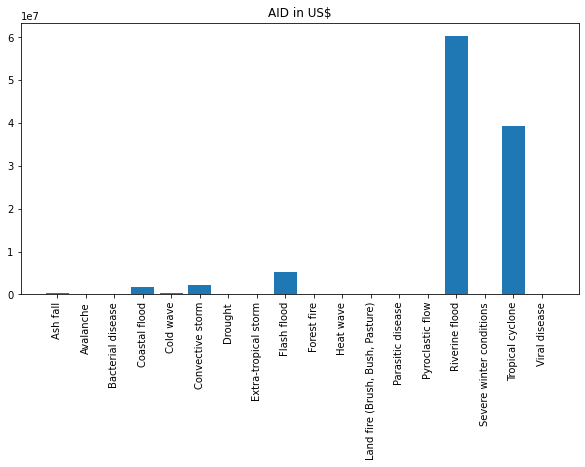

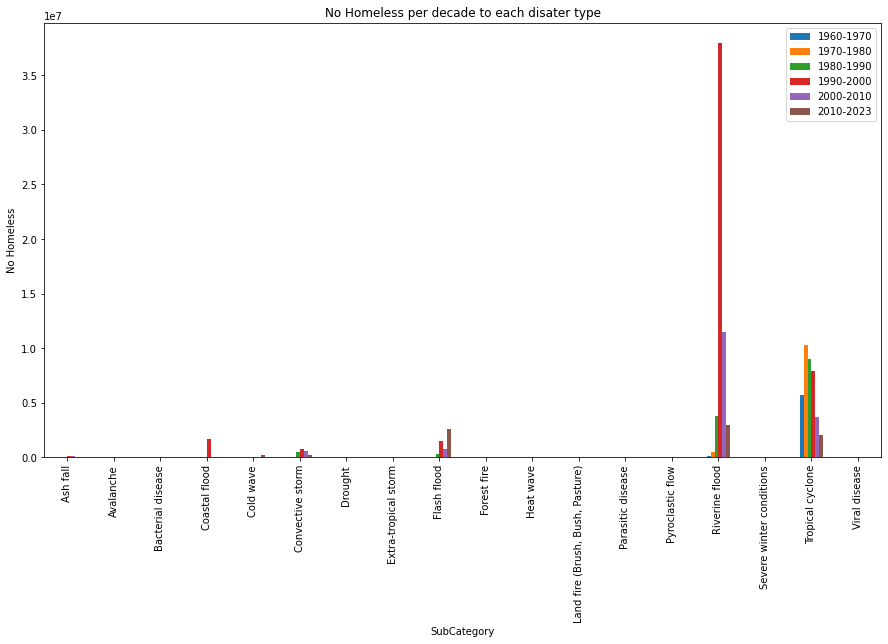

In [271]:
Categories = Deaths.groupby('Disaster Subtype')['No Homeless'].sum()
print(Categories)
plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.title('AID in US$')
plt.show()

Plotting_summable_Data(Data=Deaths, column_to_be_plotted = 'No Homeless')